In [2]:
import os

# Update the path to the OpenSlide bin directory
OPENSLIDE_PATH = r'C:\Users\JUHI\openslide-bin-4.0.0.6-windows-x64\bin'

if hasattr(os, 'add_dll_directory'):
    with os.add_dll_directory(OPENSLIDE_PATH):
        import openslide
else:
    import openslide

print("OpenSlide loaded successfully!")


OpenSlide loaded successfully!


In [4]:
import openslide

# Replace with your WSI file path
wsi_path = 'C:/Users/JUHI/Downloads/wsi_image.svs'

# Open the WSI
slide = openslide.OpenSlide(wsi_path)

# Print properties of the WSI
print("Slide dimensions:", slide.dimensions)
print("Number of levels:", slide.level_count)
print("Level dimensions:", slide.level_dimensions)


Slide dimensions: (46000, 32893)
Number of levels: 3
Level dimensions: ((46000, 32893), (11500, 8223), (2875, 2055))


In [5]:
# Generate a thumbnail of the WSI (e.g., 500x500)
thumbnail = slide.get_thumbnail((500, 500))
thumbnail.show()


In [6]:
import cv2
import numpy as np
from PIL import Image

# Extract a region (top-left corner for this example)
region = slide.read_region((0, 0), 0, slide.level_dimensions[0])
region = np.array(region.convert("RGB"))  # Convert to NumPy array

# Convert to grayscale
gray = cv2.cvtColor(region, cv2.COLOR_RGB2GRAY)

# Apply a threshold to remove white background
_, mask = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY_INV)

# Use the mask to keep only the stained region
result = cv2.bitwise_and(region, region, mask=mask)

# Convert back to PIL and display
Image.fromarray(result).show()


In [7]:
patch_size = 299  # Size of each patch

# Extract a patch from (x, y) = (1000, 1000)
patch = slide.read_region((1000, 1000), 0, (patch_size, patch_size))
patch = patch.convert("RGB")  # Convert to RGB

# Display the patch
patch.show()


In [8]:
# Define the step size (can be same as patch size or overlapping)
step_size = 299

# Loop through the WSI and extract patches
for y in range(0, slide.dimensions[1], step_size):
    for x in range(0, slide.dimensions[0], step_size):
        patch = slide.read_region((x, y), 0, (patch_size, patch_size))
        patch = patch.convert("RGB")
        
        # Perform prediction or save the patch
        patch.save(f'D:/PATENT/wsi patches/patch_{x}_{y}.png')


In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Load your model (replace with the correct path to your model)
model = load_model("D:/PATENT/Model_testing/inflam_modified25.h5")

# Load a patch and prepare it for prediction
patch = load_img('D:/PATENT/wsi patches/patch_1000_1000.png', target_size=(299, 299))
patch_array = img_to_array(patch) / 255.0
patch_array = np.expand_dims(patch_array, axis=0)

# Predict the score for the patch
prediction = model.predict(patch_array)
predicted_score = np.argmax(prediction)
print("Predicted Score:", predicted_score)


In [ ]:
import numpy as np

# Example list of predictions from patches
patch_scores = [2, 3, 2, 1, 3, 2]

# Calculate the mean score
final_score = np.mean(patch_scores)
print("Final Score for the WSI:", final_score)


In [ ]:
slide.close()

In [ ]:
# New implementation

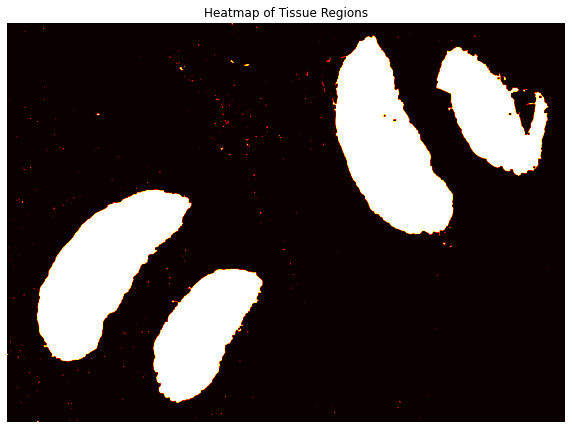

Saved patch_299_0.png with tissue coverage: 0.69
Saved patch_598_0.png with tissue coverage: 0.32
Saved patch_897_0.png with tissue coverage: 0.55
Saved patch_1196_0.png with tissue coverage: 0.50
Saved patch_1495_0.png with tissue coverage: 0.24
Saved patch_1794_0.png with tissue coverage: 0.18
Saved patch_2093_0.png with tissue coverage: 0.39
Saved patch_2392_0.png with tissue coverage: 0.91
Saved patch_2691_0.png with tissue coverage: 0.87
Saved patch_2990_0.png with tissue coverage: 0.73
Saved patch_3887_0.png with tissue coverage: 0.55
Saved patch_4186_0.png with tissue coverage: 0.99
Saved patch_4485_0.png with tissue coverage: 0.21
Saved patch_5382_0.png with tissue coverage: 0.27
Saved patch_6279_0.png with tissue coverage: 0.65
Saved patch_6578_0.png with tissue coverage: 0.87
Saved patch_6877_0.png with tissue coverage: 0.18
Saved patch_7176_0.png with tissue coverage: 0.39
Saved patch_7475_0.png with tissue coverage: 0.70
Saved patch_7774_0.png with tissue coverage: 0.29
Sav

Saved patch_14053_897.png with tissue coverage: 0.72
Saved patch_14352_897.png with tissue coverage: 0.80
Saved patch_14651_897.png with tissue coverage: 0.28
Saved patch_26611_897.png with tissue coverage: 0.24
Saved patch_26910_897.png with tissue coverage: 0.88
Saved patch_27508_897.png with tissue coverage: 0.55
Saved patch_28405_897.png with tissue coverage: 0.30
Saved patch_28704_897.png with tissue coverage: 0.85
Saved patch_29601_897.png with tissue coverage: 0.21
Saved patch_30199_897.png with tissue coverage: 0.18
Saved patch_30498_897.png with tissue coverage: 0.71
Saved patch_31096_897.png with tissue coverage: 0.52
Saved patch_32292_897.png with tissue coverage: 0.10
Saved patch_32591_897.png with tissue coverage: 0.21
Saved patch_33787_897.png with tissue coverage: 1.00
Saved patch_35581_897.png with tissue coverage: 1.00
Saved patch_40963_897.png with tissue coverage: 1.00
Saved patch_43355_897.png with tissue coverage: 1.00
Saved patch_43654_897.png with tissue coverage

Saved patch_40664_1794.png with tissue coverage: 1.00
Saved patch_40963_1794.png with tissue coverage: 1.00
Saved patch_41860_1794.png with tissue coverage: 1.00
Saved patch_42458_1794.png with tissue coverage: 1.00
Saved patch_43654_1794.png with tissue coverage: 1.00
Saved patch_45747_1794.png with tissue coverage: 0.15
Saved patch_598_2093.png with tissue coverage: 0.19
Saved patch_897_2093.png with tissue coverage: 0.25
Saved patch_1495_2093.png with tissue coverage: 0.26
Saved patch_1794_2093.png with tissue coverage: 0.27
Saved patch_2990_2093.png with tissue coverage: 0.22
Saved patch_4186_2093.png with tissue coverage: 0.23
Saved patch_4485_2093.png with tissue coverage: 0.43
Saved patch_5083_2093.png with tissue coverage: 0.43
Saved patch_5382_2093.png with tissue coverage: 0.33
Saved patch_5681_2093.png with tissue coverage: 0.91
Saved patch_5980_2093.png with tissue coverage: 0.81
Saved patch_6279_2093.png with tissue coverage: 0.89
Saved patch_6578_2093.png with tissue cove

Saved patch_37973_2691.png with tissue coverage: 0.66
Saved patch_38272_2691.png with tissue coverage: 0.66
Saved patch_38571_2691.png with tissue coverage: 0.32
Saved patch_39169_2691.png with tissue coverage: 0.12
Saved patch_39767_2691.png with tissue coverage: 0.42
Saved patch_43056_2691.png with tissue coverage: 1.00
Saved patch_43355_2691.png with tissue coverage: 1.00
Saved patch_45747_2691.png with tissue coverage: 0.15
Saved patch_0_2990.png with tissue coverage: 0.15
Saved patch_299_2990.png with tissue coverage: 0.22
Saved patch_598_2990.png with tissue coverage: 0.65
Saved patch_897_2990.png with tissue coverage: 0.71
Saved patch_1196_2990.png with tissue coverage: 0.43
Saved patch_1495_2990.png with tissue coverage: 0.75
Saved patch_2392_2990.png with tissue coverage: 0.61
Saved patch_3289_2990.png with tissue coverage: 0.67
Saved patch_3588_2990.png with tissue coverage: 0.64
Saved patch_3887_2990.png with tissue coverage: 0.69
Saved patch_4485_2990.png with tissue covera

Saved patch_3588_3588.png with tissue coverage: 0.14
Saved patch_5382_3588.png with tissue coverage: 0.31
Saved patch_5681_3588.png with tissue coverage: 0.12
Saved patch_7475_3588.png with tissue coverage: 0.27
Saved patch_14053_3588.png with tissue coverage: 0.15
Saved patch_14352_3588.png with tissue coverage: 0.16
Saved patch_15548_3588.png with tissue coverage: 0.15
Saved patch_16146_3588.png with tissue coverage: 0.15
Saved patch_16744_3588.png with tissue coverage: 0.11
Saved patch_18538_3588.png with tissue coverage: 0.91
Saved patch_18837_3588.png with tissue coverage: 0.17
Saved patch_19136_3588.png with tissue coverage: 0.48
Saved patch_19435_3588.png with tissue coverage: 0.56
Saved patch_19734_3588.png with tissue coverage: 0.40
Saved patch_20033_3588.png with tissue coverage: 0.22
Saved patch_20332_3588.png with tissue coverage: 0.86
Saved patch_22724_3588.png with tissue coverage: 1.00
Saved patch_26312_3588.png with tissue coverage: 0.22
Saved patch_26611_3588.png with 

Saved patch_6578_4186.png with tissue coverage: 0.34
Saved patch_6877_4186.png with tissue coverage: 0.74
Saved patch_7176_4186.png with tissue coverage: 0.86
Saved patch_7774_4186.png with tissue coverage: 0.26
Saved patch_8073_4186.png with tissue coverage: 0.35
Saved patch_8372_4186.png with tissue coverage: 0.99
Saved patch_9568_4186.png with tissue coverage: 1.00
Saved patch_10166_4186.png with tissue coverage: 0.24
Saved patch_20332_4186.png with tissue coverage: 1.00
Saved patch_26312_4186.png with tissue coverage: 0.23
Saved patch_26611_4186.png with tissue coverage: 0.58
Saved patch_27209_4186.png with tissue coverage: 0.37
Saved patch_27508_4186.png with tissue coverage: 0.53
Saved patch_27807_4186.png with tissue coverage: 0.26
Saved patch_28106_4186.png with tissue coverage: 0.73
Saved patch_28405_4186.png with tissue coverage: 0.72
Saved patch_28704_4186.png with tissue coverage: 0.46
Saved patch_29003_4186.png with tissue coverage: 0.56
Saved patch_29302_4186.png with tis

Saved patch_3887_4784.png with tissue coverage: 0.43
Saved patch_4186_4784.png with tissue coverage: 0.27
Saved patch_6578_4784.png with tissue coverage: 0.22
Saved patch_6877_4784.png with tissue coverage: 0.39
Saved patch_7176_4784.png with tissue coverage: 0.54
Saved patch_7475_4784.png with tissue coverage: 0.17
Saved patch_7774_4784.png with tissue coverage: 0.15
Saved patch_8372_4784.png with tissue coverage: 0.21
Saved patch_8671_4784.png with tissue coverage: 0.29
Saved patch_12259_4784.png with tissue coverage: 0.10
Saved patch_26312_4784.png with tissue coverage: 0.44
Saved patch_27209_4784.png with tissue coverage: 0.58
Saved patch_27508_4784.png with tissue coverage: 0.59
Saved patch_27807_4784.png with tissue coverage: 0.41
Saved patch_28106_4784.png with tissue coverage: 0.43
Saved patch_28405_4784.png with tissue coverage: 0.62
Saved patch_28704_4784.png with tissue coverage: 0.47
Saved patch_29003_4784.png with tissue coverage: 0.53
Saved patch_29302_4784.png with tissu

Saved patch_27508_5382.png with tissue coverage: 0.38
Saved patch_27807_5382.png with tissue coverage: 0.26
Saved patch_28106_5382.png with tissue coverage: 0.37
Saved patch_28405_5382.png with tissue coverage: 0.45
Saved patch_28704_5382.png with tissue coverage: 0.55
Saved patch_29003_5382.png with tissue coverage: 0.41
Saved patch_29302_5382.png with tissue coverage: 0.26
Saved patch_29601_5382.png with tissue coverage: 0.21
Saved patch_29900_5382.png with tissue coverage: 0.86
Saved patch_30199_5382.png with tissue coverage: 0.72
Saved patch_30498_5382.png with tissue coverage: 0.34
Saved patch_30797_5382.png with tissue coverage: 0.41
Saved patch_31096_5382.png with tissue coverage: 0.50
Saved patch_31395_5382.png with tissue coverage: 0.75
Saved patch_31694_5382.png with tissue coverage: 0.65
Saved patch_31993_5382.png with tissue coverage: 0.51
Saved patch_32591_5382.png with tissue coverage: 0.12
Saved patch_32890_5382.png with tissue coverage: 0.93
Saved patch_33189_5382.png w

Saved patch_29302_5980.png with tissue coverage: 0.22
Saved patch_29601_5980.png with tissue coverage: 0.27
Saved patch_29900_5980.png with tissue coverage: 0.14
Saved patch_30199_5980.png with tissue coverage: 0.28
Saved patch_30498_5980.png with tissue coverage: 0.49
Saved patch_30797_5980.png with tissue coverage: 0.23
Saved patch_31096_5980.png with tissue coverage: 0.28
Saved patch_31395_5980.png with tissue coverage: 0.44
Saved patch_31694_5980.png with tissue coverage: 0.56
Saved patch_31993_5980.png with tissue coverage: 0.58
Saved patch_32591_5980.png with tissue coverage: 0.60
Saved patch_32890_5980.png with tissue coverage: 0.32
Saved patch_33189_5980.png with tissue coverage: 0.94
Saved patch_33488_5980.png with tissue coverage: 0.74
Saved patch_33787_5980.png with tissue coverage: 0.47
Saved patch_34086_5980.png with tissue coverage: 0.59
Saved patch_34385_5980.png with tissue coverage: 0.53
Saved patch_34684_5980.png with tissue coverage: 0.58
Saved patch_34983_5980.png w

Saved patch_29900_6578.png with tissue coverage: 0.28
Saved patch_30199_6578.png with tissue coverage: 0.30
Saved patch_30498_6578.png with tissue coverage: 0.22
Saved patch_30797_6578.png with tissue coverage: 0.24
Saved patch_31096_6578.png with tissue coverage: 0.28
Saved patch_31395_6578.png with tissue coverage: 0.29
Saved patch_31694_6578.png with tissue coverage: 0.27
Saved patch_31993_6578.png with tissue coverage: 0.31
Saved patch_32292_6578.png with tissue coverage: 0.70
Saved patch_32591_6578.png with tissue coverage: 0.21
Saved patch_32890_6578.png with tissue coverage: 0.53
Saved patch_33189_6578.png with tissue coverage: 0.19
Saved patch_33488_6578.png with tissue coverage: 0.93
Saved patch_33787_6578.png with tissue coverage: 0.67
Saved patch_34086_6578.png with tissue coverage: 0.53
Saved patch_34385_6578.png with tissue coverage: 0.43
Saved patch_34684_6578.png with tissue coverage: 0.32
Saved patch_34983_6578.png with tissue coverage: 0.57
Saved patch_35282_6578.png w

Saved patch_28704_7176.png with tissue coverage: 0.26
Saved patch_29003_7176.png with tissue coverage: 0.21
Saved patch_29302_7176.png with tissue coverage: 0.33
Saved patch_29601_7176.png with tissue coverage: 0.32
Saved patch_29900_7176.png with tissue coverage: 0.56
Saved patch_30199_7176.png with tissue coverage: 0.42
Saved patch_30498_7176.png with tissue coverage: 0.45
Saved patch_30797_7176.png with tissue coverage: 0.65
Saved patch_31096_7176.png with tissue coverage: 0.55
Saved patch_31395_7176.png with tissue coverage: 0.50
Saved patch_31694_7176.png with tissue coverage: 0.51
Saved patch_31993_7176.png with tissue coverage: 0.65
Saved patch_32292_7176.png with tissue coverage: 0.64
Saved patch_32591_7176.png with tissue coverage: 0.52
Saved patch_33189_7176.png with tissue coverage: 0.67
Saved patch_33488_7176.png with tissue coverage: 0.30
Saved patch_33787_7176.png with tissue coverage: 0.88
Saved patch_34086_7176.png with tissue coverage: 0.40
Saved patch_34385_7176.png w

Saved patch_29601_7774.png with tissue coverage: 0.34
Saved patch_29900_7774.png with tissue coverage: 0.31
Saved patch_30199_7774.png with tissue coverage: 0.49
Saved patch_30498_7774.png with tissue coverage: 0.57
Saved patch_30797_7774.png with tissue coverage: 0.54
Saved patch_31096_7774.png with tissue coverage: 0.45
Saved patch_31395_7774.png with tissue coverage: 0.34
Saved patch_31694_7774.png with tissue coverage: 0.63
Saved patch_31993_7774.png with tissue coverage: 0.75
Saved patch_32292_7774.png with tissue coverage: 0.63
Saved patch_32591_7774.png with tissue coverage: 0.37
Saved patch_32890_7774.png with tissue coverage: 0.73
Saved patch_33488_7774.png with tissue coverage: 0.81
Saved patch_33787_7774.png with tissue coverage: 0.26
Saved patch_34086_7774.png with tissue coverage: 0.53
Saved patch_34385_7774.png with tissue coverage: 0.53
Saved patch_34684_7774.png with tissue coverage: 0.22
Saved patch_35880_7774.png with tissue coverage: 0.46
Saved patch_36179_7774.png w

Saved patch_33488_8372.png with tissue coverage: 0.20
Saved patch_33787_8372.png with tissue coverage: 0.86
Saved patch_34086_8372.png with tissue coverage: 0.29
Saved patch_34385_8372.png with tissue coverage: 0.28
Saved patch_34684_8372.png with tissue coverage: 0.90
Saved patch_34983_8372.png with tissue coverage: 0.80
Saved patch_35282_8372.png with tissue coverage: 0.76
Saved patch_35581_8372.png with tissue coverage: 0.52
Saved patch_35880_8372.png with tissue coverage: 0.83
Saved patch_36179_8372.png with tissue coverage: 0.21
Saved patch_36478_8372.png with tissue coverage: 0.34
Saved patch_36777_8372.png with tissue coverage: 0.82
Saved patch_37076_8372.png with tissue coverage: 0.25
Saved patch_37375_8372.png with tissue coverage: 0.70
Saved patch_37674_8372.png with tissue coverage: 0.76
Saved patch_37973_8372.png with tissue coverage: 0.72
Saved patch_38272_8372.png with tissue coverage: 0.45
Saved patch_38571_8372.png with tissue coverage: 0.30
Saved patch_38870_8372.png w

Saved patch_37375_8970.png with tissue coverage: 0.36
Saved patch_37674_8970.png with tissue coverage: 0.68
Saved patch_37973_8970.png with tissue coverage: 0.74
Saved patch_38272_8970.png with tissue coverage: 0.75
Saved patch_38571_8970.png with tissue coverage: 0.51
Saved patch_38870_8970.png with tissue coverage: 0.38
Saved patch_39169_8970.png with tissue coverage: 0.47
Saved patch_39468_8970.png with tissue coverage: 0.57
Saved patch_39767_8970.png with tissue coverage: 0.74
Saved patch_40066_8970.png with tissue coverage: 0.63
Saved patch_40365_8970.png with tissue coverage: 0.48
Saved patch_40664_8970.png with tissue coverage: 0.43
Saved patch_40963_8970.png with tissue coverage: 0.63
Saved patch_41262_8970.png with tissue coverage: 0.63
Saved patch_41561_8970.png with tissue coverage: 0.62
Saved patch_41860_8970.png with tissue coverage: 0.66
Saved patch_42159_8970.png with tissue coverage: 0.48
Saved patch_42458_8970.png with tissue coverage: 0.55
Saved patch_42757_8970.png w

Saved patch_37973_9568.png with tissue coverage: 0.65
Saved patch_38272_9568.png with tissue coverage: 0.72
Saved patch_38571_9568.png with tissue coverage: 0.73
Saved patch_38870_9568.png with tissue coverage: 0.65
Saved patch_39169_9568.png with tissue coverage: 0.63
Saved patch_39468_9568.png with tissue coverage: 0.71
Saved patch_39767_9568.png with tissue coverage: 0.73
Saved patch_40066_9568.png with tissue coverage: 0.71
Saved patch_40365_9568.png with tissue coverage: 0.63
Saved patch_40664_9568.png with tissue coverage: 0.72
Saved patch_40963_9568.png with tissue coverage: 0.35
Saved patch_41262_9568.png with tissue coverage: 0.54
Saved patch_41561_9568.png with tissue coverage: 0.54
Saved patch_41860_9568.png with tissue coverage: 0.50
Saved patch_42159_9568.png with tissue coverage: 0.44
Saved patch_42458_9568.png with tissue coverage: 0.36
Saved patch_42757_9568.png with tissue coverage: 0.57
Saved patch_43056_9568.png with tissue coverage: 0.58
Saved patch_43355_9568.png w

Saved patch_39169_10166.png with tissue coverage: 0.48
Saved patch_39468_10166.png with tissue coverage: 0.51
Saved patch_39767_10166.png with tissue coverage: 0.67
Saved patch_40066_10166.png with tissue coverage: 0.64
Saved patch_40365_10166.png with tissue coverage: 0.63
Saved patch_40664_10166.png with tissue coverage: 0.70
Saved patch_40963_10166.png with tissue coverage: 0.68
Saved patch_41262_10166.png with tissue coverage: 0.67
Saved patch_41561_10166.png with tissue coverage: 0.68
Saved patch_41860_10166.png with tissue coverage: 0.70
Saved patch_42159_10166.png with tissue coverage: 0.70
Saved patch_42458_10166.png with tissue coverage: 0.55
Saved patch_42757_10166.png with tissue coverage: 0.70
Saved patch_43056_10166.png with tissue coverage: 0.69
Saved patch_43355_10166.png with tissue coverage: 0.66
Saved patch_43654_10166.png with tissue coverage: 0.66
Saved patch_43953_10166.png with tissue coverage: 0.20
Saved patch_44551_10166.png with tissue coverage: 0.94
Saved patc

Saved patch_39468_10764.png with tissue coverage: 0.59
Saved patch_39767_10764.png with tissue coverage: 0.60
Saved patch_40066_10764.png with tissue coverage: 0.56
Saved patch_40365_10764.png with tissue coverage: 0.42
Saved patch_40664_10764.png with tissue coverage: 0.67
Saved patch_40963_10764.png with tissue coverage: 0.58
Saved patch_41262_10764.png with tissue coverage: 0.56
Saved patch_41561_10764.png with tissue coverage: 0.45
Saved patch_41860_10764.png with tissue coverage: 0.59
Saved patch_42159_10764.png with tissue coverage: 0.63
Saved patch_42458_10764.png with tissue coverage: 0.54
Saved patch_42757_10764.png with tissue coverage: 0.58
Saved patch_43056_10764.png with tissue coverage: 0.44
Saved patch_43355_10764.png with tissue coverage: 0.74
Saved patch_43654_10764.png with tissue coverage: 0.61
Saved patch_44252_10764.png with tissue coverage: 0.47
Saved patch_44551_10764.png with tissue coverage: 0.39
Saved patch_44850_10764.png with tissue coverage: 0.85
Saved patc

Saved patch_42757_11362.png with tissue coverage: 0.42
Saved patch_43056_11362.png with tissue coverage: 0.61
Saved patch_43355_11362.png with tissue coverage: 0.41
Saved patch_43654_11362.png with tissue coverage: 0.30
Saved patch_43953_11362.png with tissue coverage: 0.61
Saved patch_44252_11362.png with tissue coverage: 0.41
Saved patch_44551_11362.png with tissue coverage: 0.69
Saved patch_44850_11362.png with tissue coverage: 0.44
Saved patch_45149_11362.png with tissue coverage: 0.64
Saved patch_45448_11362.png with tissue coverage: 0.84
Saved patch_45747_11362.png with tissue coverage: 0.15
Saved patch_1495_11661.png with tissue coverage: 0.54
Saved patch_2093_11661.png with tissue coverage: 0.34
Saved patch_2691_11661.png with tissue coverage: 0.26
Saved patch_2990_11661.png with tissue coverage: 0.48
Saved patch_3289_11661.png with tissue coverage: 0.32
Saved patch_3588_11661.png with tissue coverage: 0.24
Saved patch_5083_11661.png with tissue coverage: 0.10
Saved patch_5980_

Saved patch_43056_11960.png with tissue coverage: 0.45
Saved patch_43953_11960.png with tissue coverage: 0.78
Saved patch_44252_11960.png with tissue coverage: 0.78
Saved patch_45149_11960.png with tissue coverage: 0.19
Saved patch_45448_11960.png with tissue coverage: 0.46
Saved patch_45747_11960.png with tissue coverage: 0.15
Saved patch_0_12259.png with tissue coverage: 0.24
Saved patch_299_12259.png with tissue coverage: 0.18
Saved patch_1794_12259.png with tissue coverage: 0.57
Saved patch_3289_12259.png with tissue coverage: 0.30
Saved patch_3887_12259.png with tissue coverage: 0.24
Saved patch_4186_12259.png with tissue coverage: 0.15
Saved patch_7774_12259.png with tissue coverage: 0.25
Saved patch_8073_12259.png with tissue coverage: 0.10
Saved patch_8372_12259.png with tissue coverage: 0.13
Saved patch_10465_12259.png with tissue coverage: 0.16
Saved patch_11960_12259.png with tissue coverage: 0.26
Saved patch_12259_12259.png with tissue coverage: 0.25
Saved patch_12857_12259

Saved patch_43355_12558.png with tissue coverage: 0.72
Saved patch_43654_12558.png with tissue coverage: 0.60
Saved patch_43953_12558.png with tissue coverage: 0.17
Saved patch_44252_12558.png with tissue coverage: 0.14
Saved patch_44551_12558.png with tissue coverage: 0.38
Saved patch_44850_12558.png with tissue coverage: 0.66
Saved patch_45149_12558.png with tissue coverage: 0.32
Saved patch_45747_12558.png with tissue coverage: 0.15
Saved patch_0_12857.png with tissue coverage: 0.27
Saved patch_299_12857.png with tissue coverage: 0.70
Saved patch_598_12857.png with tissue coverage: 0.75
Saved patch_1495_12857.png with tissue coverage: 0.79
Saved patch_1794_12857.png with tissue coverage: 0.36
Saved patch_2691_12857.png with tissue coverage: 0.35
Saved patch_2990_12857.png with tissue coverage: 0.15
Saved patch_3289_12857.png with tissue coverage: 0.24
Saved patch_3588_12857.png with tissue coverage: 0.31
Saved patch_4784_12857.png with tissue coverage: 0.38
Saved patch_6279_12857.pn

Saved patch_35880_13156.png with tissue coverage: 0.68
Saved patch_36777_13156.png with tissue coverage: 0.58
Saved patch_37076_13156.png with tissue coverage: 0.26
Saved patch_37375_13156.png with tissue coverage: 0.23
Saved patch_37674_13156.png with tissue coverage: 0.77
Saved patch_37973_13156.png with tissue coverage: 0.41
Saved patch_38272_13156.png with tissue coverage: 0.40
Saved patch_38571_13156.png with tissue coverage: 0.34
Saved patch_38870_13156.png with tissue coverage: 0.32
Saved patch_39169_13156.png with tissue coverage: 0.37
Saved patch_39468_13156.png with tissue coverage: 0.41
Saved patch_39767_13156.png with tissue coverage: 0.37
Saved patch_40066_13156.png with tissue coverage: 0.34
Saved patch_40365_13156.png with tissue coverage: 0.26
Saved patch_40963_13156.png with tissue coverage: 0.45
Saved patch_41262_13156.png with tissue coverage: 0.37
Saved patch_41561_13156.png with tissue coverage: 0.27
Saved patch_42458_13156.png with tissue coverage: 0.12
Saved patc

Saved patch_32591_13754.png with tissue coverage: 0.50
Saved patch_32890_13754.png with tissue coverage: 0.59
Saved patch_33189_13754.png with tissue coverage: 0.58
Saved patch_33488_13754.png with tissue coverage: 0.59
Saved patch_33787_13754.png with tissue coverage: 0.58
Saved patch_34086_13754.png with tissue coverage: 0.66
Saved patch_34385_13754.png with tissue coverage: 0.63
Saved patch_34684_13754.png with tissue coverage: 0.57
Saved patch_34983_13754.png with tissue coverage: 0.55
Saved patch_35282_13754.png with tissue coverage: 0.53
Saved patch_35581_13754.png with tissue coverage: 0.45
Saved patch_35880_13754.png with tissue coverage: 0.41
Saved patch_36179_13754.png with tissue coverage: 0.64
Saved patch_36478_13754.png with tissue coverage: 0.35
Saved patch_37076_13754.png with tissue coverage: 0.91
Saved patch_37375_13754.png with tissue coverage: 0.42
Saved patch_37674_13754.png with tissue coverage: 0.56
Saved patch_37973_13754.png with tissue coverage: 0.77
Saved patc

Saved patch_24219_14352.png with tissue coverage: 0.63
Saved patch_24518_14352.png with tissue coverage: 0.89
Saved patch_24817_14352.png with tissue coverage: 0.98
Saved patch_25116_14352.png with tissue coverage: 0.55
Saved patch_26312_14352.png with tissue coverage: 0.24
Saved patch_26611_14352.png with tissue coverage: 0.42
Saved patch_26910_14352.png with tissue coverage: 0.53
Saved patch_27209_14352.png with tissue coverage: 0.56
Saved patch_27508_14352.png with tissue coverage: 0.44
Saved patch_28704_14352.png with tissue coverage: 0.49
Saved patch_29003_14352.png with tissue coverage: 0.88
Saved patch_29601_14352.png with tissue coverage: 0.60
Saved patch_29900_14352.png with tissue coverage: 0.44
Saved patch_30199_14352.png with tissue coverage: 0.39
Saved patch_30498_14352.png with tissue coverage: 0.36
Saved patch_30797_14352.png with tissue coverage: 0.28
Saved patch_31096_14352.png with tissue coverage: 0.27
Saved patch_31395_14352.png with tissue coverage: 0.42
Saved patc

Saved patch_8372_14950.png with tissue coverage: 0.59
Saved patch_8671_14950.png with tissue coverage: 0.81
Saved patch_8970_14950.png with tissue coverage: 0.40
Saved patch_9269_14950.png with tissue coverage: 0.38
Saved patch_9568_14950.png with tissue coverage: 0.32
Saved patch_9867_14950.png with tissue coverage: 0.26
Saved patch_10166_14950.png with tissue coverage: 0.33
Saved patch_10465_14950.png with tissue coverage: 0.42
Saved patch_10764_14950.png with tissue coverage: 0.55
Saved patch_11063_14950.png with tissue coverage: 0.38
Saved patch_11362_14950.png with tissue coverage: 0.66
Saved patch_11661_14950.png with tissue coverage: 0.71
Saved patch_11960_14950.png with tissue coverage: 0.71
Saved patch_12259_14950.png with tissue coverage: 0.67
Saved patch_12558_14950.png with tissue coverage: 0.70
Saved patch_12857_14950.png with tissue coverage: 0.69
Saved patch_13156_14950.png with tissue coverage: 0.69
Saved patch_13455_14950.png with tissue coverage: 0.69
Saved patch_1375

Saved patch_37973_15249.png with tissue coverage: 0.19
Saved patch_38571_15249.png with tissue coverage: 0.11
Saved patch_38870_15249.png with tissue coverage: 0.18
Saved patch_39169_15249.png with tissue coverage: 0.53
Saved patch_39468_15249.png with tissue coverage: 0.71
Saved patch_39767_15249.png with tissue coverage: 0.37
Saved patch_40066_15249.png with tissue coverage: 0.13
Saved patch_40365_15249.png with tissue coverage: 0.21
Saved patch_45448_15249.png with tissue coverage: 0.12
Saved patch_45747_15249.png with tissue coverage: 0.15
Saved patch_299_15548.png with tissue coverage: 0.33
Saved patch_897_15548.png with tissue coverage: 0.30
Saved patch_1794_15548.png with tissue coverage: 0.38
Saved patch_2392_15548.png with tissue coverage: 0.41
Saved patch_2990_15548.png with tissue coverage: 0.38
Saved patch_4485_15548.png with tissue coverage: 0.69
Saved patch_4784_15548.png with tissue coverage: 0.78
Saved patch_5980_15548.png with tissue coverage: 0.58
Saved patch_7176_155

Saved patch_30797_15847.png with tissue coverage: 0.52
Saved patch_31096_15847.png with tissue coverage: 0.62
Saved patch_31395_15847.png with tissue coverage: 0.29
Saved patch_31694_15847.png with tissue coverage: 0.70
Saved patch_31993_15847.png with tissue coverage: 0.64
Saved patch_32292_15847.png with tissue coverage: 0.39
Saved patch_32591_15847.png with tissue coverage: 0.34
Saved patch_32890_15847.png with tissue coverage: 0.32
Saved patch_33189_15847.png with tissue coverage: 0.28
Saved patch_33488_15847.png with tissue coverage: 0.23
Saved patch_33787_15847.png with tissue coverage: 0.29
Saved patch_34086_15847.png with tissue coverage: 0.31
Saved patch_34385_15847.png with tissue coverage: 0.51
Saved patch_34684_15847.png with tissue coverage: 0.36
Saved patch_34983_15847.png with tissue coverage: 0.37
Saved patch_35282_15847.png with tissue coverage: 0.36
Saved patch_35581_15847.png with tissue coverage: 0.38
Saved patch_35880_15847.png with tissue coverage: 0.73
Saved patc

Saved patch_18837_16445.png with tissue coverage: 0.11
Saved patch_19136_16445.png with tissue coverage: 0.11
Saved patch_27209_16445.png with tissue coverage: 0.11
Saved patch_28106_16445.png with tissue coverage: 0.23
Saved patch_28405_16445.png with tissue coverage: 0.33
Saved patch_28704_16445.png with tissue coverage: 0.18
Saved patch_29003_16445.png with tissue coverage: 0.43
Saved patch_29302_16445.png with tissue coverage: 0.58
Saved patch_29601_16445.png with tissue coverage: 0.28
Saved patch_29900_16445.png with tissue coverage: 0.84
Saved patch_30199_16445.png with tissue coverage: 0.94
Saved patch_30797_16445.png with tissue coverage: 0.92
Saved patch_31395_16445.png with tissue coverage: 0.30
Saved patch_31694_16445.png with tissue coverage: 0.78
Saved patch_31993_16445.png with tissue coverage: 0.30
Saved patch_32292_16445.png with tissue coverage: 0.49
Saved patch_32591_16445.png with tissue coverage: 0.58
Saved patch_32890_16445.png with tissue coverage: 0.64
Saved patc

Saved patch_10764_17043.png with tissue coverage: 0.22
Saved patch_11063_17043.png with tissue coverage: 0.76
Saved patch_11362_17043.png with tissue coverage: 0.64
Saved patch_11661_17043.png with tissue coverage: 0.81
Saved patch_11960_17043.png with tissue coverage: 0.21
Saved patch_12259_17043.png with tissue coverage: 0.23
Saved patch_12558_17043.png with tissue coverage: 0.37
Saved patch_12857_17043.png with tissue coverage: 0.45
Saved patch_13156_17043.png with tissue coverage: 0.63
Saved patch_13455_17043.png with tissue coverage: 0.70
Saved patch_13754_17043.png with tissue coverage: 0.34
Saved patch_14950_17043.png with tissue coverage: 0.70
Saved patch_15249_17043.png with tissue coverage: 0.75
Saved patch_15548_17043.png with tissue coverage: 0.55
Saved patch_16744_17043.png with tissue coverage: 0.38
Saved patch_17043_17043.png with tissue coverage: 0.43
Saved patch_17342_17043.png with tissue coverage: 0.27
Saved patch_17641_17043.png with tissue coverage: 0.11
Saved patc

Saved patch_299_17641.png with tissue coverage: 0.24
Saved patch_598_17641.png with tissue coverage: 0.58
Saved patch_1495_17641.png with tissue coverage: 0.70
Saved patch_2093_17641.png with tissue coverage: 0.65
Saved patch_2691_17641.png with tissue coverage: 0.73
Saved patch_2990_17641.png with tissue coverage: 0.72
Saved patch_3588_17641.png with tissue coverage: 0.70
Saved patch_3887_17641.png with tissue coverage: 0.89
Saved patch_5083_17641.png with tissue coverage: 0.19
Saved patch_5382_17641.png with tissue coverage: 0.55
Saved patch_5681_17641.png with tissue coverage: 0.67
Saved patch_5980_17641.png with tissue coverage: 0.57
Saved patch_6279_17641.png with tissue coverage: 0.59
Saved patch_6578_17641.png with tissue coverage: 0.62
Saved patch_6877_17641.png with tissue coverage: 0.35
Saved patch_7176_17641.png with tissue coverage: 0.30
Saved patch_7475_17641.png with tissue coverage: 0.32
Saved patch_7774_17641.png with tissue coverage: 0.37
Saved patch_8073_17641.png wit

Saved patch_23023_17940.png with tissue coverage: 0.39
Saved patch_23322_17940.png with tissue coverage: 0.75
Saved patch_24518_17940.png with tissue coverage: 0.58
Saved patch_25116_17940.png with tissue coverage: 0.13
Saved patch_25714_17940.png with tissue coverage: 0.12
Saved patch_26013_17940.png with tissue coverage: 0.15
Saved patch_26312_17940.png with tissue coverage: 0.15
Saved patch_26910_17940.png with tissue coverage: 0.10
Saved patch_27209_17940.png with tissue coverage: 0.13
Saved patch_29003_17940.png with tissue coverage: 0.14
Saved patch_29302_17940.png with tissue coverage: 0.29
Saved patch_29601_17940.png with tissue coverage: 0.34
Saved patch_29900_17940.png with tissue coverage: 0.39
Saved patch_30199_17940.png with tissue coverage: 0.55
Saved patch_30498_17940.png with tissue coverage: 0.78
Saved patch_30797_17940.png with tissue coverage: 0.65
Saved patch_31096_17940.png with tissue coverage: 0.35
Saved patch_31395_17940.png with tissue coverage: 0.53
Saved patc

Saved patch_9867_18538.png with tissue coverage: 0.69
Saved patch_10166_18538.png with tissue coverage: 0.46
Saved patch_10465_18538.png with tissue coverage: 0.31
Saved patch_10764_18538.png with tissue coverage: 0.32
Saved patch_11063_18538.png with tissue coverage: 0.57
Saved patch_11362_18538.png with tissue coverage: 0.75
Saved patch_11661_18538.png with tissue coverage: 0.74
Saved patch_11960_18538.png with tissue coverage: 0.67
Saved patch_12259_18538.png with tissue coverage: 0.13
Saved patch_14053_18538.png with tissue coverage: 0.84
Saved patch_15548_18538.png with tissue coverage: 0.35
Saved patch_16146_18538.png with tissue coverage: 0.27
Saved patch_16744_18538.png with tissue coverage: 0.54
Saved patch_17043_18538.png with tissue coverage: 0.79
Saved patch_17342_18538.png with tissue coverage: 0.80
Saved patch_17641_18538.png with tissue coverage: 0.45
Saved patch_17940_18538.png with tissue coverage: 0.58
Saved patch_19435_18538.png with tissue coverage: 0.66
Saved patch

Saved patch_14651_19136.png with tissue coverage: 0.85
Saved patch_14950_19136.png with tissue coverage: 0.69
Saved patch_15548_19136.png with tissue coverage: 0.80
Saved patch_16146_19136.png with tissue coverage: 0.85
Saved patch_17043_19136.png with tissue coverage: 0.56
Saved patch_17641_19136.png with tissue coverage: 0.60
Saved patch_17940_19136.png with tissue coverage: 0.35
Saved patch_18538_19136.png with tissue coverage: 0.40
Saved patch_18837_19136.png with tissue coverage: 0.86
Saved patch_19136_19136.png with tissue coverage: 0.84
Saved patch_20033_19136.png with tissue coverage: 0.69
Saved patch_20332_19136.png with tissue coverage: 0.51
Saved patch_20631_19136.png with tissue coverage: 0.86
Saved patch_20930_19136.png with tissue coverage: 0.75
Saved patch_21229_19136.png with tissue coverage: 0.66
Saved patch_21528_19136.png with tissue coverage: 0.65
Saved patch_21827_19136.png with tissue coverage: 0.13
Saved patch_22724_19136.png with tissue coverage: 0.22
Saved patc

Saved patch_34086_19734.png with tissue coverage: 0.34
Saved patch_34385_19734.png with tissue coverage: 0.29
Saved patch_34684_19734.png with tissue coverage: 0.27
Saved patch_34983_19734.png with tissue coverage: 0.13
Saved patch_37973_19734.png with tissue coverage: 0.15
Saved patch_38272_19734.png with tissue coverage: 0.79
Saved patch_39169_19734.png with tissue coverage: 0.95
Saved patch_39468_19734.png with tissue coverage: 0.30
Saved patch_39767_19734.png with tissue coverage: 1.00
Saved patch_40066_19734.png with tissue coverage: 1.00
Saved patch_43355_19734.png with tissue coverage: 1.00
Saved patch_44551_19734.png with tissue coverage: 0.17
Saved patch_44850_19734.png with tissue coverage: 0.15
Saved patch_45747_19734.png with tissue coverage: 0.15
Saved patch_0_20033.png with tissue coverage: 0.64
Saved patch_598_20033.png with tissue coverage: 0.54
Saved patch_1196_20033.png with tissue coverage: 0.63
Saved patch_3588_20033.png with tissue coverage: 0.80
Saved patch_3887_2

Saved patch_7774_20631.png with tissue coverage: 0.59
Saved patch_8073_20631.png with tissue coverage: 0.66
Saved patch_8372_20631.png with tissue coverage: 0.48
Saved patch_8671_20631.png with tissue coverage: 0.31
Saved patch_8970_20631.png with tissue coverage: 0.61
Saved patch_9269_20631.png with tissue coverage: 0.34
Saved patch_9568_20631.png with tissue coverage: 0.22
Saved patch_9867_20631.png with tissue coverage: 0.66
Saved patch_10166_20631.png with tissue coverage: 0.72
Saved patch_10465_20631.png with tissue coverage: 0.35
Saved patch_12259_20631.png with tissue coverage: 0.57
Saved patch_12558_20631.png with tissue coverage: 0.63
Saved patch_13754_20631.png with tissue coverage: 0.66
Saved patch_14053_20631.png with tissue coverage: 0.58
Saved patch_14352_20631.png with tissue coverage: 0.60
Saved patch_15847_20631.png with tissue coverage: 0.98
Saved patch_16445_20631.png with tissue coverage: 0.54
Saved patch_16744_20631.png with tissue coverage: 0.70
Saved patch_17043_

Saved patch_14053_21229.png with tissue coverage: 0.88
Saved patch_14352_21229.png with tissue coverage: 0.96
Saved patch_15548_21229.png with tissue coverage: 0.45
Saved patch_15847_21229.png with tissue coverage: 0.44
Saved patch_16146_21229.png with tissue coverage: 0.68
Saved patch_16445_21229.png with tissue coverage: 0.69
Saved patch_16744_21229.png with tissue coverage: 0.67
Saved patch_17043_21229.png with tissue coverage: 0.49
Saved patch_17342_21229.png with tissue coverage: 0.66
Saved patch_17641_21229.png with tissue coverage: 0.68
Saved patch_17940_21229.png with tissue coverage: 0.67
Saved patch_18239_21229.png with tissue coverage: 0.64
Saved patch_18538_21229.png with tissue coverage: 0.51
Saved patch_18837_21229.png with tissue coverage: 0.74
Saved patch_19136_21229.png with tissue coverage: 0.73
Saved patch_19435_21229.png with tissue coverage: 0.73
Saved patch_19734_21229.png with tissue coverage: 0.83
Saved patch_20033_21229.png with tissue coverage: 0.64
Saved patc

Saved patch_16146_21827.png with tissue coverage: 0.46
Saved patch_16445_21827.png with tissue coverage: 0.44
Saved patch_16744_21827.png with tissue coverage: 0.53
Saved patch_17043_21827.png with tissue coverage: 0.61
Saved patch_17342_21827.png with tissue coverage: 0.67
Saved patch_17641_21827.png with tissue coverage: 0.68
Saved patch_17940_21827.png with tissue coverage: 0.64
Saved patch_18239_21827.png with tissue coverage: 0.56
Saved patch_18538_21827.png with tissue coverage: 0.62
Saved patch_18837_21827.png with tissue coverage: 0.70
Saved patch_19136_21827.png with tissue coverage: 0.71
Saved patch_19435_21827.png with tissue coverage: 0.81
Saved patch_19734_21827.png with tissue coverage: 0.75
Saved patch_20033_21827.png with tissue coverage: 0.57
Saved patch_20332_21827.png with tissue coverage: 0.66
Saved patch_20631_21827.png with tissue coverage: 0.66
Saved patch_21827_21827.png with tissue coverage: 0.76
Saved patch_22126_21827.png with tissue coverage: 0.87
Saved patc

Saved patch_21827_22425.png with tissue coverage: 0.65
Saved patch_22126_22425.png with tissue coverage: 0.53
Saved patch_22425_22425.png with tissue coverage: 0.43
Saved patch_22724_22425.png with tissue coverage: 0.36
Saved patch_23023_22425.png with tissue coverage: 0.32
Saved patch_23322_22425.png with tissue coverage: 0.30
Saved patch_23621_22425.png with tissue coverage: 0.32
Saved patch_23920_22425.png with tissue coverage: 0.27
Saved patch_24219_22425.png with tissue coverage: 0.35
Saved patch_24518_22425.png with tissue coverage: 0.32
Saved patch_24817_22425.png with tissue coverage: 0.31
Saved patch_25116_22425.png with tissue coverage: 0.29
Saved patch_25415_22425.png with tissue coverage: 0.21
Saved patch_25714_22425.png with tissue coverage: 0.11
Saved patch_26312_22425.png with tissue coverage: 0.25
Saved patch_26611_22425.png with tissue coverage: 0.29
Saved patch_26910_22425.png with tissue coverage: 0.11
Saved patch_27807_22425.png with tissue coverage: 0.17
Saved patc

Saved patch_17342_23023.png with tissue coverage: 0.57
Saved patch_17641_23023.png with tissue coverage: 0.64
Saved patch_17940_23023.png with tissue coverage: 0.69
Saved patch_18239_23023.png with tissue coverage: 0.72
Saved patch_18538_23023.png with tissue coverage: 0.72
Saved patch_18837_23023.png with tissue coverage: 0.68
Saved patch_19136_23023.png with tissue coverage: 0.73
Saved patch_19435_23023.png with tissue coverage: 0.69
Saved patch_19734_23023.png with tissue coverage: 0.72
Saved patch_20033_23023.png with tissue coverage: 0.48
Saved patch_21229_23023.png with tissue coverage: 1.00
Saved patch_21528_23023.png with tissue coverage: 0.90
Saved patch_21827_23023.png with tissue coverage: 0.70
Saved patch_22126_23023.png with tissue coverage: 0.58
Saved patch_22425_23023.png with tissue coverage: 0.47
Saved patch_22724_23023.png with tissue coverage: 0.46
Saved patch_23023_23023.png with tissue coverage: 0.40
Saved patch_23322_23023.png with tissue coverage: 0.26
Saved patc

Saved patch_5681_23621.png with tissue coverage: 0.55
Saved patch_5980_23621.png with tissue coverage: 0.58
Saved patch_6279_23621.png with tissue coverage: 0.46
Saved patch_6578_23621.png with tissue coverage: 0.52
Saved patch_6877_23621.png with tissue coverage: 0.49
Saved patch_7176_23621.png with tissue coverage: 0.61
Saved patch_7475_23621.png with tissue coverage: 0.64
Saved patch_7774_23621.png with tissue coverage: 0.51
Saved patch_8073_23621.png with tissue coverage: 0.57
Saved patch_8372_23621.png with tissue coverage: 0.65
Saved patch_8671_23621.png with tissue coverage: 0.48
Saved patch_10166_23621.png with tissue coverage: 0.61
Saved patch_11960_23621.png with tissue coverage: 0.71
Saved patch_13455_23621.png with tissue coverage: 0.30
Saved patch_13754_23621.png with tissue coverage: 0.63
Saved patch_14053_23621.png with tissue coverage: 0.73
Saved patch_14352_23621.png with tissue coverage: 0.68
Saved patch_14651_23621.png with tissue coverage: 0.73
Saved patch_14950_236

Saved patch_37973_23920.png with tissue coverage: 0.63
Saved patch_38870_23920.png with tissue coverage: 0.23
Saved patch_39169_23920.png with tissue coverage: 0.19
Saved patch_45747_23920.png with tissue coverage: 0.15
Saved patch_2392_24219.png with tissue coverage: 0.60
Saved patch_2691_24219.png with tissue coverage: 0.39
Saved patch_2990_24219.png with tissue coverage: 0.45
Saved patch_3289_24219.png with tissue coverage: 0.40
Saved patch_3588_24219.png with tissue coverage: 0.30
Saved patch_3887_24219.png with tissue coverage: 0.17
Saved patch_4186_24219.png with tissue coverage: 0.15
Saved patch_4485_24219.png with tissue coverage: 0.20
Saved patch_4784_24219.png with tissue coverage: 0.42
Saved patch_5083_24219.png with tissue coverage: 0.57
Saved patch_5382_24219.png with tissue coverage: 0.53
Saved patch_5681_24219.png with tissue coverage: 0.48
Saved patch_5980_24219.png with tissue coverage: 0.59
Saved patch_6279_24219.png with tissue coverage: 0.56
Saved patch_6578_24219.p

Saved patch_40664_24518.png with tissue coverage: 0.16
Saved patch_40963_24518.png with tissue coverage: 0.44
Saved patch_41262_24518.png with tissue coverage: 0.14
Saved patch_42458_24518.png with tissue coverage: 0.24
Saved patch_42757_24518.png with tissue coverage: 0.87
Saved patch_43056_24518.png with tissue coverage: 0.92
Saved patch_43355_24518.png with tissue coverage: 0.60
Saved patch_43654_24518.png with tissue coverage: 1.00
Saved patch_45747_24518.png with tissue coverage: 0.15
Saved patch_598_24817.png with tissue coverage: 0.85
Saved patch_2392_24817.png with tissue coverage: 0.19
Saved patch_2691_24817.png with tissue coverage: 0.52
Saved patch_2990_24817.png with tissue coverage: 0.53
Saved patch_3289_24817.png with tissue coverage: 0.49
Saved patch_3588_24817.png with tissue coverage: 0.35
Saved patch_3887_24817.png with tissue coverage: 0.23
Saved patch_4186_24817.png with tissue coverage: 0.21
Saved patch_4485_24817.png with tissue coverage: 0.38
Saved patch_4784_248

Saved patch_24817_25116.png with tissue coverage: 0.23
Saved patch_25116_25116.png with tissue coverage: 0.29
Saved patch_25415_25116.png with tissue coverage: 0.25
Saved patch_25714_25116.png with tissue coverage: 0.26
Saved patch_26013_25116.png with tissue coverage: 0.15
Saved patch_26312_25116.png with tissue coverage: 0.30
Saved patch_26611_25116.png with tissue coverage: 0.27
Saved patch_26910_25116.png with tissue coverage: 0.13
Saved patch_27209_25116.png with tissue coverage: 0.14
Saved patch_29302_25116.png with tissue coverage: 0.16
Saved patch_31694_25116.png with tissue coverage: 0.14
Saved patch_32292_25116.png with tissue coverage: 0.18
Saved patch_34684_25116.png with tissue coverage: 0.13
Saved patch_34983_25116.png with tissue coverage: 0.23
Saved patch_35581_25116.png with tissue coverage: 0.23
Saved patch_35880_25116.png with tissue coverage: 0.13
Saved patch_36777_25116.png with tissue coverage: 0.25
Saved patch_37076_25116.png with tissue coverage: 0.38
Saved patc

Saved patch_15249_25714.png with tissue coverage: 0.63
Saved patch_15548_25714.png with tissue coverage: 0.60
Saved patch_15847_25714.png with tissue coverage: 0.66
Saved patch_16146_25714.png with tissue coverage: 0.49
Saved patch_16445_25714.png with tissue coverage: 0.43
Saved patch_16744_25714.png with tissue coverage: 0.40
Saved patch_17043_25714.png with tissue coverage: 0.67
Saved patch_17342_25714.png with tissue coverage: 0.70
Saved patch_17641_25714.png with tissue coverage: 0.66
Saved patch_17940_25714.png with tissue coverage: 0.70
Saved patch_18239_25714.png with tissue coverage: 0.65
Saved patch_18538_25714.png with tissue coverage: 0.12
Saved patch_18837_25714.png with tissue coverage: 1.00
Saved patch_19136_25714.png with tissue coverage: 1.00
Saved patch_19734_25714.png with tissue coverage: 0.90
Saved patch_20631_25714.png with tissue coverage: 0.88
Saved patch_20930_25714.png with tissue coverage: 0.84
Saved patch_21229_25714.png with tissue coverage: 0.76
Saved patc

Saved patch_5083_26312.png with tissue coverage: 0.32
Saved patch_5382_26312.png with tissue coverage: 0.28
Saved patch_5681_26312.png with tissue coverage: 0.34
Saved patch_5980_26312.png with tissue coverage: 0.45
Saved patch_6279_26312.png with tissue coverage: 0.49
Saved patch_6578_26312.png with tissue coverage: 0.64
Saved patch_6877_26312.png with tissue coverage: 0.64
Saved patch_7176_26312.png with tissue coverage: 0.65
Saved patch_11960_26312.png with tissue coverage: 0.41
Saved patch_12259_26312.png with tissue coverage: 0.64
Saved patch_12558_26312.png with tissue coverage: 0.75
Saved patch_12857_26312.png with tissue coverage: 0.59
Saved patch_13156_26312.png with tissue coverage: 0.61
Saved patch_13455_26312.png with tissue coverage: 0.51
Saved patch_13754_26312.png with tissue coverage: 0.33
Saved patch_14053_26312.png with tissue coverage: 0.47
Saved patch_14352_26312.png with tissue coverage: 0.59
Saved patch_14651_26312.png with tissue coverage: 0.61
Saved patch_14950_

Saved patch_5681_26910.png with tissue coverage: 0.64
Saved patch_5980_26910.png with tissue coverage: 0.88
Saved patch_6279_26910.png with tissue coverage: 0.80
Saved patch_6578_26910.png with tissue coverage: 0.90
Saved patch_6877_26910.png with tissue coverage: 0.39
Saved patch_8671_26910.png with tissue coverage: 0.87
Saved patch_8970_26910.png with tissue coverage: 0.80
Saved patch_9568_26910.png with tissue coverage: 0.91
Saved patch_11960_26910.png with tissue coverage: 0.45
Saved patch_12259_26910.png with tissue coverage: 0.63
Saved patch_12558_26910.png with tissue coverage: 0.71
Saved patch_12857_26910.png with tissue coverage: 0.57
Saved patch_13156_26910.png with tissue coverage: 0.40
Saved patch_13455_26910.png with tissue coverage: 0.63
Saved patch_13754_26910.png with tissue coverage: 0.45
Saved patch_14053_26910.png with tissue coverage: 0.53
Saved patch_14352_26910.png with tissue coverage: 0.54
Saved patch_14651_26910.png with tissue coverage: 0.63
Saved patch_14950_

Saved patch_13754_27508.png with tissue coverage: 0.38
Saved patch_14053_27508.png with tissue coverage: 0.73
Saved patch_14352_27508.png with tissue coverage: 0.67
Saved patch_14651_27508.png with tissue coverage: 0.67
Saved patch_14950_27508.png with tissue coverage: 0.59
Saved patch_15249_27508.png with tissue coverage: 0.58
Saved patch_15548_27508.png with tissue coverage: 0.60
Saved patch_15847_27508.png with tissue coverage: 0.60
Saved patch_16146_27508.png with tissue coverage: 0.60
Saved patch_16445_27508.png with tissue coverage: 0.59
Saved patch_16744_27508.png with tissue coverage: 0.63
Saved patch_17043_27508.png with tissue coverage: 0.75
Saved patch_17342_27508.png with tissue coverage: 0.67
Saved patch_17641_27508.png with tissue coverage: 0.17
Saved patch_17940_27508.png with tissue coverage: 0.25
Saved patch_18239_27508.png with tissue coverage: 0.63
Saved patch_18837_27508.png with tissue coverage: 0.32
Saved patch_19136_27508.png with tissue coverage: 0.59
Saved patc

Saved patch_17940_28106.png with tissue coverage: 0.44
Saved patch_18239_28106.png with tissue coverage: 0.82
Saved patch_18837_28106.png with tissue coverage: 0.86
Saved patch_19136_28106.png with tissue coverage: 0.78
Saved patch_19734_28106.png with tissue coverage: 0.80
Saved patch_20033_28106.png with tissue coverage: 0.32
Saved patch_20332_28106.png with tissue coverage: 0.80
Saved patch_20930_28106.png with tissue coverage: 0.79
Saved patch_21229_28106.png with tissue coverage: 0.46
Saved patch_21528_28106.png with tissue coverage: 0.11
Saved patch_21827_28106.png with tissue coverage: 0.56
Saved patch_22126_28106.png with tissue coverage: 0.58
Saved patch_22425_28106.png with tissue coverage: 0.86
Saved patch_22724_28106.png with tissue coverage: 0.80
Saved patch_23023_28106.png with tissue coverage: 0.23
Saved patch_23322_28106.png with tissue coverage: 0.11
Saved patch_24219_28106.png with tissue coverage: 0.25
Saved patch_24817_28106.png with tissue coverage: 0.12
Saved patc

Saved patch_24817_28704.png with tissue coverage: 0.13
Saved patch_25116_28704.png with tissue coverage: 0.13
Saved patch_28405_28704.png with tissue coverage: 0.16
Saved patch_28704_28704.png with tissue coverage: 0.12
Saved patch_29003_28704.png with tissue coverage: 0.15
Saved patch_30498_28704.png with tissue coverage: 0.57
Saved patch_30797_28704.png with tissue coverage: 0.81
Saved patch_31096_28704.png with tissue coverage: 0.64
Saved patch_31694_28704.png with tissue coverage: 0.11
Saved patch_31993_28704.png with tissue coverage: 0.17
Saved patch_32890_28704.png with tissue coverage: 0.15
Saved patch_33189_28704.png with tissue coverage: 0.15
Saved patch_34684_28704.png with tissue coverage: 0.17
Saved patch_34983_28704.png with tissue coverage: 0.11
Saved patch_37076_28704.png with tissue coverage: 0.20
Saved patch_38272_28704.png with tissue coverage: 0.11
Saved patch_38571_28704.png with tissue coverage: 0.28
Saved patch_38870_28704.png with tissue coverage: 0.34
Saved patc

Saved patch_31096_29302.png with tissue coverage: 0.12
Saved patch_31395_29302.png with tissue coverage: 0.26
Saved patch_31694_29302.png with tissue coverage: 0.27
Saved patch_31993_29302.png with tissue coverage: 0.36
Saved patch_32292_29302.png with tissue coverage: 0.20
Saved patch_32890_29302.png with tissue coverage: 0.21
Saved patch_33189_29302.png with tissue coverage: 0.19
Saved patch_34684_29302.png with tissue coverage: 0.14
Saved patch_35581_29302.png with tissue coverage: 1.00
Saved patch_35880_29302.png with tissue coverage: 1.00
Saved patch_36777_29302.png with tissue coverage: 0.23
Saved patch_37076_29302.png with tissue coverage: 0.18
Saved patch_37375_29302.png with tissue coverage: 0.17
Saved patch_45149_29302.png with tissue coverage: 0.11
Saved patch_45448_29302.png with tissue coverage: 0.17
Saved patch_45747_29302.png with tissue coverage: 0.15
Saved patch_0_29601.png with tissue coverage: 0.66
Saved patch_598_29601.png with tissue coverage: 0.70
Saved patch_3887

Saved patch_9568_30199.png with tissue coverage: 0.87
Saved patch_9867_30199.png with tissue coverage: 0.84
Saved patch_10166_30199.png with tissue coverage: 0.80
Saved patch_10465_30199.png with tissue coverage: 0.70
Saved patch_11661_30199.png with tissue coverage: 0.93
Saved patch_12558_30199.png with tissue coverage: 0.65
Saved patch_12857_30199.png with tissue coverage: 0.65
Saved patch_13156_30199.png with tissue coverage: 0.38
Saved patch_13455_30199.png with tissue coverage: 0.62
Saved patch_13754_30199.png with tissue coverage: 0.64
Saved patch_14053_30199.png with tissue coverage: 0.66
Saved patch_14352_30199.png with tissue coverage: 0.43
Saved patch_14651_30199.png with tissue coverage: 0.68
Saved patch_14950_30199.png with tissue coverage: 0.63
Saved patch_15249_30199.png with tissue coverage: 0.46
Saved patch_15548_30199.png with tissue coverage: 0.61
Saved patch_15847_30199.png with tissue coverage: 0.44
Saved patch_16445_30199.png with tissue coverage: 0.99
Saved patch_

Saved patch_21827_30797.png with tissue coverage: 0.18
Saved patch_22126_30797.png with tissue coverage: 0.11
Saved patch_23023_30797.png with tissue coverage: 0.20
Saved patch_23322_30797.png with tissue coverage: 0.21
Saved patch_23621_30797.png with tissue coverage: 0.13
Saved patch_24518_30797.png with tissue coverage: 0.14
Saved patch_24817_30797.png with tissue coverage: 0.15
Saved patch_25116_30797.png with tissue coverage: 0.15
Saved patch_25415_30797.png with tissue coverage: 0.10
Saved patch_26611_30797.png with tissue coverage: 0.12
Saved patch_26910_30797.png with tissue coverage: 0.22
Saved patch_27209_30797.png with tissue coverage: 0.21
Saved patch_27508_30797.png with tissue coverage: 0.27
Saved patch_27807_30797.png with tissue coverage: 0.30
Saved patch_28106_30797.png with tissue coverage: 0.36
Saved patch_28405_30797.png with tissue coverage: 0.17
Saved patch_28704_30797.png with tissue coverage: 0.13
Saved patch_31694_30797.png with tissue coverage: 0.11
Saved patc

Saved patch_34684_31395.png with tissue coverage: 0.12
Saved patch_35282_31395.png with tissue coverage: 0.19
Saved patch_35581_31395.png with tissue coverage: 0.28
Saved patch_35880_31395.png with tissue coverage: 0.21
Saved patch_36179_31395.png with tissue coverage: 0.24
Saved patch_42159_31395.png with tissue coverage: 0.13
Saved patch_42458_31395.png with tissue coverage: 0.29
Saved patch_42757_31395.png with tissue coverage: 0.38
Saved patch_43056_31395.png with tissue coverage: 0.12
Saved patch_44551_31395.png with tissue coverage: 0.25
Saved patch_44850_31395.png with tissue coverage: 0.22
Saved patch_45747_31395.png with tissue coverage: 0.15
Saved patch_299_31694.png with tissue coverage: 0.67
Saved patch_1495_31694.png with tissue coverage: 0.69
Saved patch_1794_31694.png with tissue coverage: 0.89
Saved patch_3887_31694.png with tissue coverage: 0.71
Saved patch_6279_31694.png with tissue coverage: 0.85
Saved patch_7774_31694.png with tissue coverage: 0.48
Saved patch_8372_

Saved patch_31395_31993.png with tissue coverage: 0.34
Saved patch_31694_31993.png with tissue coverage: 0.87
Saved patch_31993_31993.png with tissue coverage: 0.79
Saved patch_32292_31993.png with tissue coverage: 0.98
Saved patch_32591_31993.png with tissue coverage: 0.62
Saved patch_34385_31993.png with tissue coverage: 0.15
Saved patch_34684_31993.png with tissue coverage: 0.14
Saved patch_34983_31993.png with tissue coverage: 0.38
Saved patch_35282_31993.png with tissue coverage: 0.12
Saved patch_42159_31993.png with tissue coverage: 0.14
Saved patch_42458_31993.png with tissue coverage: 0.83
Saved patch_43056_31993.png with tissue coverage: 0.33
Saved patch_43355_31993.png with tissue coverage: 0.12
Saved patch_43654_31993.png with tissue coverage: 0.28
Saved patch_43953_31993.png with tissue coverage: 0.31
Saved patch_44252_31993.png with tissue coverage: 0.19
Saved patch_44551_31993.png with tissue coverage: 0.48
Saved patch_44850_31993.png with tissue coverage: 0.26
Saved patc

Saved patch_21528_32591.png with tissue coverage: 0.25
Saved patch_21827_32591.png with tissue coverage: 0.12
Saved patch_22126_32591.png with tissue coverage: 0.12
Saved patch_22425_32591.png with tissue coverage: 0.15
Saved patch_26611_32591.png with tissue coverage: 0.11
Saved patch_28704_32591.png with tissue coverage: 0.28
Saved patch_29003_32591.png with tissue coverage: 0.18
Saved patch_29302_32591.png with tissue coverage: 0.26
Saved patch_29900_32591.png with tissue coverage: 0.16
Saved patch_30797_32591.png with tissue coverage: 0.13
Saved patch_31694_32591.png with tissue coverage: 0.51
Saved patch_31993_32591.png with tissue coverage: 0.60
Saved patch_32292_32591.png with tissue coverage: 0.64
Saved patch_34086_32591.png with tissue coverage: 0.87
Saved patch_34684_32591.png with tissue coverage: 0.79
Saved patch_39468_32591.png with tissue coverage: 0.43
Saved patch_39767_32591.png with tissue coverage: 0.20
Saved patch_40066_32591.png with tissue coverage: 0.29
Saved patc

Saved patch_39767_32890.png with tissue coverage: 0.99
Saved patch_40066_32890.png with tissue coverage: 0.99
Saved patch_40365_32890.png with tissue coverage: 0.99
Saved patch_40664_32890.png with tissue coverage: 0.99
Saved patch_40963_32890.png with tissue coverage: 0.99
Saved patch_41262_32890.png with tissue coverage: 0.99
Saved patch_41561_32890.png with tissue coverage: 0.99
Saved patch_41860_32890.png with tissue coverage: 0.99
Saved patch_42159_32890.png with tissue coverage: 0.99
Saved patch_42458_32890.png with tissue coverage: 0.99
Saved patch_42757_32890.png with tissue coverage: 0.99
Saved patch_43056_32890.png with tissue coverage: 0.99
Saved patch_43355_32890.png with tissue coverage: 0.99
Saved patch_43654_32890.png with tissue coverage: 0.99
Saved patch_43953_32890.png with tissue coverage: 0.99
Saved patch_44252_32890.png with tissue coverage: 0.99
Saved patch_44551_32890.png with tissue coverage: 0.99
Saved patch_44850_32890.png with tissue coverage: 0.99
Saved patc

In [4]:
import openslide
import numpy as np
import cv2
from PIL import Image
import os
import matplotlib.pyplot as plt

# Define constants
wsi_path = 'C:/Users/JUHI/Downloads/wsi_image.svs'  # Path to WSI
patch_size = 299  # Size of patches to extract
tissue_threshold = 0.1  # Minimum tissue ratio to keep a patch

# Create a directory to store filtered patches
os.makedirs("filtered_patches", exist_ok=True)

# Load the WSI using OpenSlide
slide = openslide.OpenSlide(wsi_path)

# Generate a low-resolution thumbnail to create a heatmap
thumbnail = slide.get_thumbnail((slide.dimensions[0] // 32, slide.dimensions[1] // 32))
thumbnail_np = np.array(thumbnail)

# Convert thumbnail to grayscale for heatmap generation
gray_thumbnail = cv2.cvtColor(thumbnail_np, cv2.COLOR_RGB2GRAY)

# Thresholding to create a binary mask (white = background, black = tissue)
_, mask = cv2.threshold(gray_thumbnail, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Morphological closing to remove small holes in tissue regions
kernel = np.ones((5, 5), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

# Display the heatmap
plt.figure(figsize=(10, 10))
plt.imshow(mask, cmap='hot')
plt.title("Heatmap of Tissue Regions")
plt.axis('off')
plt.show()

# Function to calculate tissue coverage in a patch
def tissue_coverage(patch):
    # Convert the patch to grayscale
    gray_patch = cv2.cvtColor(np.array(patch), cv2.COLOR_RGB2GRAY)
    
    # Apply Otsu's thresholding to separate tissue from background
    _, binary_patch = cv2.threshold(gray_patch, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Calculate the ratio of tissue pixels (non-white) to total pixels
    tissue_ratio = np.sum(binary_patch == 0) / binary_patch.size
    return tissue_ratio

# Loop over the WSI to extract patches
for y in range(0, slide.dimensions[1], patch_size):
    for x in range(0, slide.dimensions[0], patch_size):
        # Read a patch from the WSI
        patch = slide.read_region((x, y), 0, (patch_size, patch_size)).convert("RGB")

        # Calculate tissue coverage in the patch
        coverage = tissue_coverage(patch)

        # Save the patch if the tissue coverage is above the threshold
        if coverage >= tissue_threshold:
            patch.save(f'D:/PATENT/wsi patches/patch_{x}_{y}.png')
            print(f"Saved patch_{x}_{y}.png with tissue coverage: {coverage:.2f}")

print("Patch extraction complete.")


In [ ]:
# FINAL IMPLEMENTATION

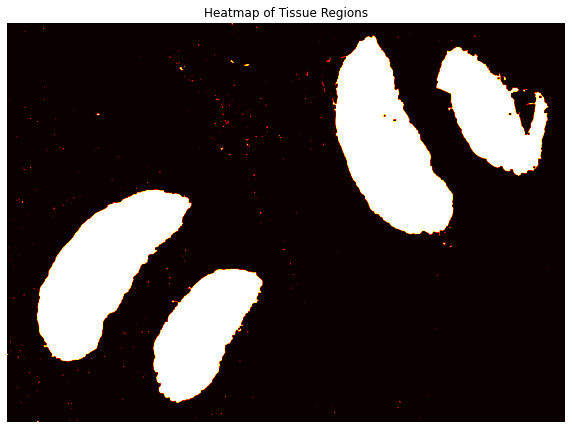

Patch extraction complete.


In [6]:
import openslide
import numpy as np
import cv2
from PIL import Image
import os
import matplotlib.pyplot as plt

# Define constants
wsi_path = 'C:/Users/JUHI/Downloads/wsi_image.svs'  # Path to WSI
patch_size = 299  # Size of patches to extract
tissue_threshold = 0.15  # Minimum tissue ratio to keep a patch

# Create a directory to store filtered patches
os.makedirs("filtered_patches", exist_ok=True)

# Load the WSI using OpenSlide
slide = openslide.OpenSlide(wsi_path)

# Generate a low-resolution thumbnail to create a heatmap
thumbnail = slide.get_thumbnail((slide.dimensions[0] // 32, slide.dimensions[1] // 32))
thumbnail_np = np.array(thumbnail)

# Convert thumbnail to grayscale for heatmap generation
gray_thumbnail = cv2.cvtColor(thumbnail_np, cv2.COLOR_RGB2GRAY)

# Thresholding to create a binary mask (white = background, black = tissue)
_, mask = cv2.threshold(gray_thumbnail, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Morphological closing to remove small holes in tissue regions
kernel = np.ones((5, 5), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

# Display the heatmap
plt.figure(figsize=(10, 10))
plt.imshow(mask, cmap='hot')
plt.title("Heatmap of Tissue Regions")
plt.axis('off')
plt.show()

# Function to check tissue coverage using Otsu's thresholding
def tissue_coverage(patch):
    # Convert the patch to grayscale
    gray_patch = cv2.cvtColor(np.array(patch), cv2.COLOR_RGB2GRAY)
    
    # Apply Otsu's thresholding to detect tissue
    _, binary_patch = cv2.threshold(gray_patch, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Calculate the ratio of tissue pixels (non-white) to total pixels
    tissue_ratio = np.sum(binary_patch == 0) / binary_patch.size
    return tissue_ratio

# Function to filter out patches that are too close to white/gray
def is_valid_patch(patch):
    # Convert the patch to HSV for color-based filtering
    hsv_patch = cv2.cvtColor(np.array(patch), cv2.COLOR_RGB2HSV)
    h, s, v = cv2.split(hsv_patch)

    # Check if the patch is too gray (low saturation and high brightness)
    mean_saturation = np.mean(s)
    mean_brightness = np.mean(v)

    if mean_saturation < 20 and mean_brightness > 200:
        return False  # Exclude patches that are too gray/bright

    # Check variance of pixel intensities to exclude flat regions
    gray_patch = cv2.cvtColor(np.array(patch), cv2.COLOR_RGB2GRAY)
    if np.var(gray_patch) < 15:
        return False  # Exclude low-variance (blurry/empty) patches

    return True  # Keep the patch

# Loop over the WSI to extract patches
for y in range(0, slide.dimensions[1], patch_size):
    for x in range(0, slide.dimensions[0], patch_size):
        # Read a patch from the WSI
        patch = slide.read_region((x, y), 0, (patch_size, patch_size)).convert("RGB")

        # Calculate tissue coverage and validate the patch
        coverage = tissue_coverage(patch)
        if coverage >= tissue_threshold and is_valid_patch(patch):
            patch.save(f'D:/PATENT/wsi patches/patch_{x}_{y}.png')

print("Patch extraction complete.")


In [ ]:
# Removing the black patches

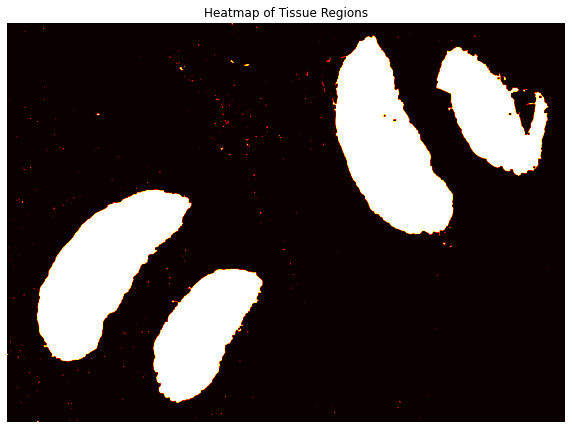

Patch extraction complete.


In [7]:
import openslide
import numpy as np
import cv2
from PIL import Image
import os
import matplotlib.pyplot as plt

# Define constants
wsi_path = 'C:/Users/JUHI/Downloads/wsi_image.svs'  # Path to WSI
patch_size = 299  # Size of patches to extract
tissue_threshold = 0.15  # Minimum tissue ratio to keep a patch

# Create a directory to store valid patches
os.makedirs("filtered_patches", exist_ok=True)

# Load the WSI using OpenSlide
slide = openslide.OpenSlide(wsi_path)

# Generate a low-resolution thumbnail to create a heatmap
thumbnail = slide.get_thumbnail((slide.dimensions[0] // 32, slide.dimensions[1] // 32))
thumbnail_np = np.array(thumbnail)

# Convert thumbnail to grayscale for heatmap generation
gray_thumbnail = cv2.cvtColor(thumbnail_np, cv2.COLOR_RGB2GRAY)

# Thresholding to create a binary mask (white = background, black = tissue)
_, mask = cv2.threshold(gray_thumbnail, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Morphological closing to remove small holes in tissue regions
kernel = np.ones((5, 5), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

# Display the heatmap
plt.figure(figsize=(10, 10))
plt.imshow(mask, cmap='hot')
plt.title("Heatmap of Tissue Regions")
plt.axis('off')
plt.show()

# Function to check tissue coverage using Otsu's thresholding
def tissue_coverage(patch):
    gray_patch = cv2.cvtColor(np.array(patch), cv2.COLOR_RGB2GRAY)
    _, binary_patch = cv2.threshold(gray_patch, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    tissue_ratio = np.sum(binary_patch == 0) / binary_patch.size
    return tissue_ratio

# Function to check if a patch is valid
def is_valid_patch(patch):
    hsv_patch = cv2.cvtColor(np.array(patch), cv2.COLOR_RGB2HSV)
    h, s, v = cv2.split(hsv_patch)

    mean_saturation = np.mean(s)
    mean_brightness = np.mean(v)

    # Exclude grayish or overly bright patches
    if mean_saturation < 20 and mean_brightness > 200:
        return False

    # Exclude patches with very low variance (black/empty)
    gray_patch = cv2.cvtColor(np.array(patch), cv2.COLOR_RGB2GRAY)
    if np.var(gray_patch) < 15:
        return False

    # Exclude very dark patches (mean pixel intensity close to 0)
    if np.mean(gray_patch) < 5:
        return False

    return True

# Loop over the WSI to extract patches
for y in range(0, slide.dimensions[1], patch_size):
    for x in range(0, slide.dimensions[0], patch_size):
        # Extract a patch from the WSI
        patch = slide.read_region((x, y), 0, (patch_size, patch_size)).convert("RGB")

        # Check tissue coverage and patch validity
        coverage = tissue_coverage(patch)
        if coverage >= tissue_threshold and is_valid_patch(patch):
            patch.save(f'D:/PATENT/wsi patches/patch_{x}_{y}.png')

print("Patch extraction complete.")
